#Introduction to Data Science
## Dealing with data
***

### The command line
From the command line, terminal, or shell you can perform almost any computer operation that you would normally use a mouse and graphical interface (GUI) for. In some cases, such as dealing with raw data files, the command line can give a quick way to start exploring.

![Terminal](images/terminal.png)

#### File system
To navigate the folder structure of the machine you are on you will typically use commands such as `ls` (list) and `cd` (change directory). You can make a directory with `mkdir` or move (`mv`) and copy (`cp`) files. To delete a file you can `rm` (remove) it. To print the contents of a file you can `cat` (concatenate) it to the screen.

Many commands have options you can set when running them. For example to get a listing of files as a vertical list you can pass the `-l` (list) flag, e.g. `ls -l`. During the normal course of using the command line, you will learn the most useful flags. If you want to see all possible options you can always read the `man` (manual) page for a command, e.g. `man ls`.

You can use shell commands in IPython notebooks by prefixing the line with an exclamation point.

In [ ]:
!ls

In [ ]:
!mkdir test

In [ ]:
!ls -l

In [ ]:
!ls -l images/

In [ ]:
!cp images/terminal.png test/some_picture.png

In [ ]:
!ls test/

In [ ]:
!rm test/

In [ ]:
# WARNING THIS WILL NOT CONFIRM!
!rm -rf test/

In [ ]:
!ls -l

#### Data manipulation and exploration
Virtually anything you want to do with a data file can be done at the command line. There are dozens of commands that can be used together to get almost any result! Lets take a look at the the file `data/users.csv`.

Before we do anything, lets take a look at the first few lines of the file to get an idea of what's in it.

In [ ]:
!head data/users.csv

Maybe we want to see a few more lines of the file,

In [ ]:
!head -15 data/users.csv

How about the last few lines of the file?

In [ ]:
!tail data/users.csv

We can count how many lines are in the file by using `wc` (a word counting tool) with the `-l` flag to count lines,

In [ ]:
!wc -l data/users.csv

It looks like there are three columns in this file, lets take a look at the first one alone.

In [ ]:
!cut -f1 -d',' data/users.csv

That's a lot of output. Let's combine the `cut` command with the `head` command,

In [ ]:
!cut -f1 -d',' data/users.csv | head

We can use pipes (`|`) to string together many commands to create very powerful one liners. For example, lets get the number of unique users in the first column.

In [ ]:
!cut -f1 -d',' data/users.csv | sort | uniq | wc -l

Or, we can get a list of the top-10 most frequently occuring users.

In [ ]:
!cut -f1 -d',' data/users.csv | sort | uniq -c | sort -nr | head

After some exploration we decide we want to keep only part of our data and bring it into a new file. Let's find all the records that have a negative value in the second and third columns and put these results in a file called `data/negative_users.csv`.

In [ ]:
!grep '.*,-.*,-.*' data/users.csv > data/negative_users.csv

We can check the data folder to see if our new file is in there,

In [ ]:
!ls -l data

#### Using Python and IPython
The command line is great for a first step in data exploration. However, to do some more in depth operations you will generally want to move to a language and environment better suited for involved data manipulation. Here, we will discuss the use of Python as a data crunching tool.

There are many ways to read data in Python. Here we will discuss two options: (1) reading line by line (streaming) and (2) using Pandas to create data frames.

Reading in data line by line can be slightly less structured since it depends on you knowing or determining what each line looks like. For structured data, this might be an unnecessary waste of time. However, for highly unstructed data, this can be very useful.

In [ ]:
# Read in the data/users.csv file line by line
file = open("data/users.csv", "r")
for line in file:
    # Break up the line
    user, variable1, variable2 = line.split(",")

    # Skip the header row
    if user == "user":
        continue

    # Print the user and the sum of variable1 and variable2
    print "%s: %.3f" % (user, float(variable1) + float(variable2))

For structured data like we have here, Pandas may make more sense.

In [1]:
# Read in data/users.csv using Pandas
import pandas as pd
users = pd.read_csv("data/users.csv")

In [2]:
# Take a look at the Panda's DataFrame
users.head()

,user,variable1,variable2
0,parallelconcerned,145.391881,-6.081689
1,driftmvc,145.788700,-5.207083
2,snowdonevasive,144.295861,-5.826789
3,cobolglaucous,146.726242,-6.569828
4,stylishmugs,147.220050,-9.443383


In [3]:
# Add another column to this DataFrame
users['sum'] = users['variable1'] + users['variable2']
users.head()

,user,variable1,variable2,sum
0,parallelconcerned,145.391881,-6.081689,139.310192
1,driftmvc,145.788700,-5.207083,140.581617
2,snowdonevasive,144.295861,-5.826789,138.469072
3,cobolglaucous,146.726242,-6.569828,140.156414
4,stylishmugs,147.220050,-9.443383,137.776667


Python and Pandas allow us to do complex tasks very easily, such as plotting.

Let's visualize the relationship between variable1 vs. variable2 in these data with a scatterplot.

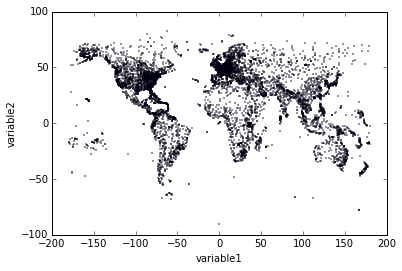

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

users.plot(kind="scatter", x="variable1", y="variable2", s=0.25)

We can update our DataFrame given the new information we discovered.

In [ ]:
users.columns = ['user', 'longitude', 'latitude', 'sum']
users.head()